To be able to run Fortan cells Google Colab you have to install and load fortanmagic before running “pip install -U fortran-magic” in a cell and “%reload_ext fortranmagic” in the following cell.

In [ ]:
pip install -U fortran-magic

In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = ["one", 'two', 3.0, "IV", 5.0, "six",7,"VIII"]
l

['one', 'two', 3.0, 'IV', 5.0, 'six', 7, 'VIII']

In [ ]:
# Lists can be indexed like C-style arrays.
third = l[2]
fifth = l[6]
print("third:", third)
print("fifth:", fifth)

third: 3.0
fifth: 7


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
antepenultimate = l[-3]
print("last:", last)
print("second to last:", penultimate)
print("third to last:", antepenultimate)

last: VIII
second to last: 7
third to last: six


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[3:5]
sublist

['IV', 5.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:7]
first_three

['one', 'two', 3.0, 'IV', 5.0, 'six', 7]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[4:]
after_three

[5.0, 'six', 7, 'VIII']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['1', '2', '3', '4', '5', '6', '7','8','9','10','11','12','13','14']
l[1:10:2]

['2', '4', '6', '8', '10']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = ['I', 'II', 'III','IV','V','VI','VII','VII']
print("Before:", l)
l.append('VII')
print("After:", l)

Before: ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VII']
After: ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VII', 'VII']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1,2,3,4,5,6,7,8,9,10]
[x * 2 for x in l]

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
friends = {'David': 'Ortiz', 'Manuel': 'Cortes', 'Jhonatan': 'Cabezas', 'Juan': 'Cisnero', 'Elkin': 'Zuluaga'}
friends

{'David': 'Ortiz',
 'Elkin': 'Zuluaga',
 'Jhonatan': 'Cabezas',
 'Juan': 'Cisnero',
 'Manuel': 'Cortes'}

In [ ]:
# Like lists, dictionaries are size-mutable.
friends['Mario'] = 'Bros'
friends

{'David': 'Ortiz',
 'Elkin': 'Zuluaga',
 'Jhonatan': 'Cabezas',
 'Juan': 'Cisnero',
 'Manuel': 'Cortes',
 'Mario': 'Bros'}

In [ ]:
del friends['David']
friends

{'Elkin': 'Zuluaga',
 'Jhonatan': 'Cabezas',
 'Juan': 'Cisnero',
 'Manuel': 'Cortes',
 'Mario': 'Bros'}

In [ ]:
# No slicing.
friends['Juan':'Cisneros']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/7f5eced41735497ecd39ac2103ab5d584417bcaa/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
m1 = [[2, 1, 3],
     [3, 2, 5],
     [1, 1, 1],
     [5, 6, 8]]

m2 = [[1, 2, 3, 4],
     [4, 6, 8, 1]]

In [ ]:
def mmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

mmul(m1, m2)

CPU times: user 20 µs, sys: 5 µs, total: 25 µs
Wall time: 27.2 µs


[[6, 10, 14, 9], [11, 18, 25, 14], [5, 8, 11, 5], [29, 46, 63, 26]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 5)
randm

[[0.21638525252512775,
  0.8444620860754839,
  0.21596106345341437,
  0.16545919121520314,
  0.46337301765645933],
 [0.8924488293964655,
  0.7162633826852407,
  0.7840257031086638,
  0.021826312477081666,
  0.946980892214565]]

In [ ]:
%%time
randa = random_matrix(800, 200)
randb = random_matrix(200, 800)
x = mmul(randa, randb)

CPU times: user 33 s, sys: 43.6 ms, total: 33 s
Wall time: 33.1 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 7.56 s, sys: 698 µs, total: 7.56 s
Wall time: 7.58 s


3.333333283334632e+23

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 193 ms, sys: 902 µs, total: 194 ms
Wall time: 194 ms


3.333333283334632e+23

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([2, 4, 6, 8])
data

array([2, 4, 6, 8])

In [ ]:
data + 1

array([3, 5, 7, 9])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 316 ms, sys: 3.02 ms, total: 319 ms
Wall time: 322 ms


3.333333283333095e+23

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 119 ms, sys: 9.06 ms, total: 128 ms
Wall time: 71.9 ms


3.3333332833335896e+23

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 169 ms, sys: 0 ns, total: 169 ms
Wall time: 174 ms


3.333333283334632e+23

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[2, 4],
       [6, 8]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int16').reshape(3, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
DType: int16
Shape: (3, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(24).reshape(4, 6)
data

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16,  25],
       [ 36,  49,  64,  81, 100, 121],
       [144, 169, 196, 225, 256, 289],
       [324, 361, 400, 441, 484, 529]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
        2.23606798],
       [2.44948974, 2.64575131, 2.82842712, 3.        , 3.16227766,
        3.31662479],
       [3.46410162, 3.60555128, 3.74165739, 3.87298335, 4.        ,
        4.12310563],
       [4.24264069, 4.35889894, 4.47213595, 4.58257569, 4.69041576,
        4.79583152]])

In [ ]:
# Comparison operations
(data % 2) == 0

array([[ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[  55,  145,  235,  325],
       [ 145,  451,  757, 1063],
       [ 235,  757, 1279, 1801],
       [ 325, 1063, 1801, 2539]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
tanes = np.tan(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
print('TAN:',tanes)
print('COS:',cosines)

TAN: [ 0.00000000e+00  3.63769843e-01  8.38496694e-01  1.72992922e+00
  5.64790107e+00 -5.70077307e+00 -1.73630571e+00 -8.41212735e-01
 -3.65574297e-01 -1.59265494e-03]
COS: [ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]


In [ ]:
# Slicing works with the same semantics as Python lists.
tanes[0]

0.0

In [ ]:
tanes[:3]  # First three elements  

array([0.        , 0.36376984, 0.83849669])

In [ ]:
cosines[5:]  # Elements from 5 on.

array([-0.17277674, -0.4990802 , -0.76524761, -0.93920748, -0.99999873])

In [ ]:
cosines[::2]  # Every other element.

array([ 1.        ,  0.76627189,  0.17434523, -0.4990802 , -0.93920748])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("cosines:\n", cosines)
print("cosines > 0.5:\n", sines > 0.5)
print("cosines[sines > 0.5]:\n", sines[sines > 0.5])

cosines:
 [ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]
cosines > 0.5:
 [False False  True  True  True  True  True  True False False]
cosines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(cosines)
cosines[[0, 4, 7]]

[ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]


array([ 1.        ,  0.17434523, -0.76524761])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 7, 2, 12, -1, 5, 2, 24, 9, -4, -2, 6])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([ 9, 10,  4,  0,  2,  6,  5, 11,  1,  8,  3,  7])

In [ ]:
unsorted_data[sort_indices]

array([-4, -2, -1,  1,  2,  2,  5,  6,  7,  9, 12, 24])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6, 8, 9])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'F', 'G', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(30).reshape(5, 6)
data

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [ ]:
data[:4, :4]  # First four rows and first four columns.

array([[ 0,  1,  2,  3],
       [ 6,  7,  8,  9],
       [12, 13, 14, 15],
       [18, 19, 20, 21]])

In [ ]:
data[:2, [1, -1]]  # First third rows, second and last columns.

array([[ 1,  5],
       [ 7, 11]])

In [ ]:
data[(data[:, 0] % 4) == 0]  # Rows where the first column is divisible by four.

array([[ 0,  1,  2,  3,  4,  5],
       [12, 13, 14, 15, 16, 17],
       [24, 25, 26, 27, 28, 29]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
%%time
variance(np.random.standard_normal(10000))

CPU times: user 1.63 ms, sys: 42 µs, total: 1.68 ms
Wall time: 1.32 ms


1.0244592592345718

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(50)
data.mean()

24.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(60).reshape(6, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [ ]:
data.mean()

29.5

In [ ]:
data.mean(axis=0)

array([25., 26., 27., 28., 29., 30., 31., 32., 33., 34.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5, 54.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3] ,[4], [5]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8],
       [6, 7, 8, 9]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]
Mean:
[25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
Data - Mean:
[[-25. -25. -25. -25. -25. -25. -25. -25. -25. -25.]
 [-15. -15. -15. -15. -15. -15. -15. -15. -15. -15.]
 [ -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.]
 [  5.   5.   5.   5.   5.   5.   5.   5.   5.   5.]
 [ 15.  15.  15.  15.  15.  15.  15.  15.  15.  15.]
 [ 25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['o', 'p', 'q', 'r', 's'], data=[1, 3, 5, 7, 9])
s

o    1
p    3
q    5
r    7
s    9
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['o', 'p', 'q', 'r', 's'], dtype='object')
The values are: [1 3 5 7 9]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[4]

9

In [ ]:
# ... or by label.
s.loc['p']

3

In [ ]:
# Slicing works as expected...
s.iloc[:3]

o    1
p    3
q    5
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'p']

o    1
p    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

o    1
s    9
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

p    3
q    5
r    7
s    9
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0, 'x': 50.0, 'y': 60.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
x    50.0
y    60.0
dtype: float64

In [ ]:
s + other_s

a   NaN
c   NaN
d   NaN
o   NaN
p   NaN
q   NaN
r   NaN
s   NaN
x   NaN
y   NaN
z   NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    0.0
c    0.0
d    0.0
o    0.0
p    0.0
q    0.0
r    0.0
s    0.0
x    0.0
y    0.0
z    0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
fb = pd.read_csv('FB.csv', parse_dates=['Date'], index_col='Date')
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-16,152.320007,159.130005,143.100006,146.009995,146.009995,39120400
2020-03-17,150.740005,153.940002,140.000000,149.419998,149.419998,34255600
2020-03-18,139.750000,148.179993,137.100006,146.960007,146.960007,37553100
2020-03-19,146.619995,159.929993,144.800003,153.130005,153.130005,39862300
2020-03-20,156.020004,159.270004,148.000000,149.729996,149.729996,32568400


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
fb.iloc[:2, :2]

,Open,High
Date,,
2020-03-16,152.320007,159.130005
2020-03-17,150.740005,153.940002


In [ ]:
aapl.loc[pd.Timestamp('2020-02-01'):pd.Timestamp('2021-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2020-03-16,146.009995,39120400
2020-03-17,149.419998,34255600
2020-03-18,146.960007,37553100
2020-03-19,153.130005,39862300
2020-03-20,149.729996,32568400
...,...,...
2021-01-29,258.329987,30389500
2021-02-01,262.010010,22914300
2021-02-02,267.079987,17320800


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

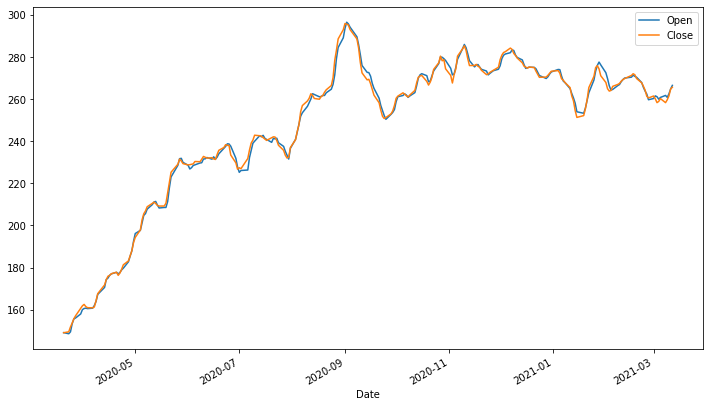

In [ ]:
fb.rolling(5)[['Open', 'Close']].mean().plot();

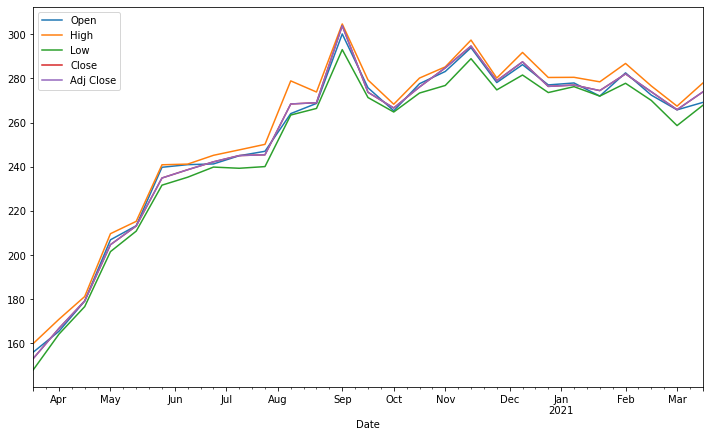

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
fb.drop('Volume', axis=1).resample('2W').max().plot();

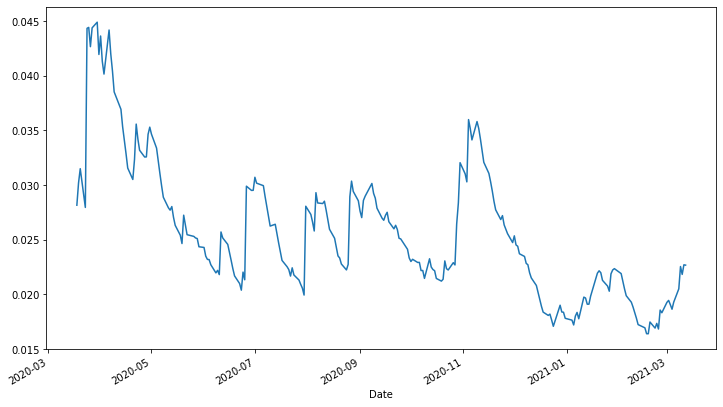

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
fb['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:

avocados = read_avocadata('2014', '2016')
print(type(avocados))
avocados.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

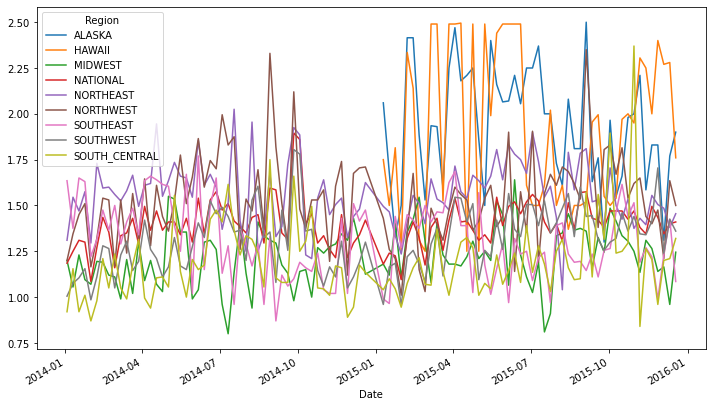

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

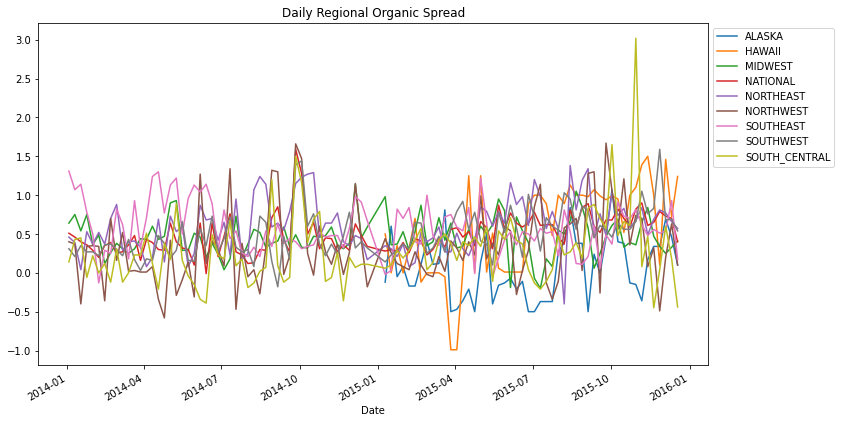

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


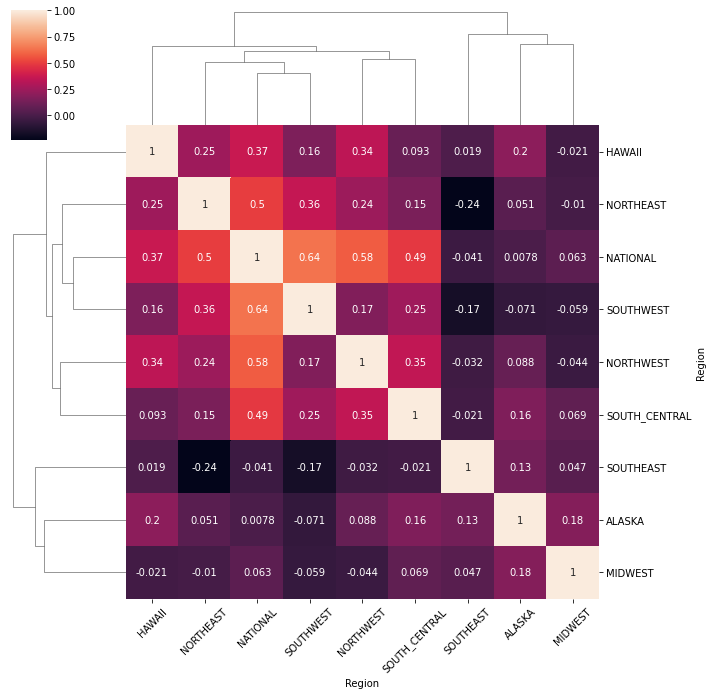

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


<figure >
<center>
<img src='https://www.cancilleria.gov.co/sites/default/files/newsroom/news/images/drg03jxwoaah9su.jpg' />
<figcaption></figcaption></center>
</figure>

#Análisis#
#Homicidios. Colombia, años 2016 a 2019.

En este conjunto de datos la ciudadanía puede encontrará información del delito de homicidio y Homicidios en accidente de Tránsito desde el 01 de enero del año 2010 al 31 de Enero del año 2021.

##Información de la Entidad
 ´ | ´
--- | ---
`Área o dependencia` | 	Dirección de Investigación Criminal e INTERPOL
`Nombre de la Entidad` | 	Dirección General de la Policía Nacional
`Orden` | Nacional
`Sector` | 	Defensa

---
[DATOS LINK](https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Homicidios-y-Homicidios-accidente-de-tr-ns/ha6j-pa2r)

[API LINK](https://dev.socrata.com/foundry/www.datos.gov.co/ha6j-pa2r)




In [ ]:
!pip install sodapy

In [ ]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ha6j-pa2r", limit=180000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etar_o,descripci_n_conducta,cantidad
0,ANTIOQUIA,AMAGÁ,5030000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
1,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
2,ANTIOQUIA,RIONEGRO,5615000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
3,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
4,ATLÁNTICO,MALAMBO,8433000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
...,...,...,...,...,...,...,...,...,...
174463,GUAJIRA,RIOHACHA (CT),44001000,VEHICULO,30/01/2021,MASCULINO,ADULTOS,HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO),1
174464,VALLE,TULUÁ,76834000,VEHICULO,30/01/2021,MASCULINO,ADULTOS,HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO),1
174465,ANTIOQUIA,GIRALDO,05306000,MOTO,31/01/2021,MASCULINO,ADULTOS,HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO),1
174466,NORTE DE SANTANDER,PAMPLONA,54518000,VEHICULO,31/01/2021,MASCULINO,ADULTOS,HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO),1


In [ ]:
results_df.dtypes

departamento            object
municipio               object
codigo_dane             object
armas_medios            object
fecha_hecho             object
genero                  object
grupo_etar_o            object
descripci_n_conducta    object
cantidad                object
dtype: object

In [ ]:
Cali = results_df[results_df.municipio == "CALI (CT)"]
Medellin = results_df[results_df.municipio =="MEDELLÍN (CT)"]
comparacion= results_df[(results_df.municipio =="MEDELLÍN (CT)") | (results_df.municipio =="CALI (CT)")]

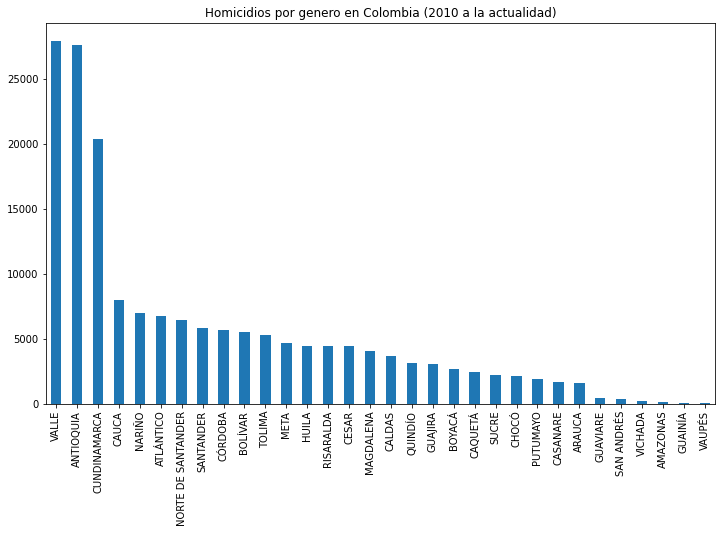

In [ ]:
plot = results_df['departamento'].value_counts().plot(kind='bar',title='Homicidios por genero en Colombia (2010 a la actualidad)');

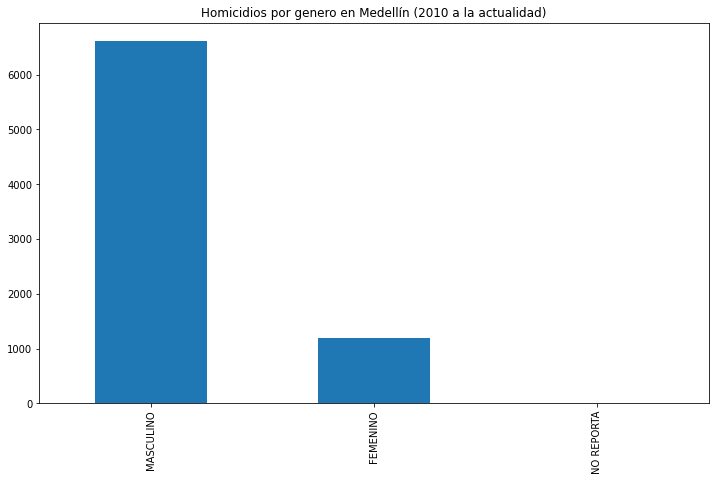

In [ ]:
plot = Medellin['genero'].value_counts().plot(kind='bar',title='Homicidios por genero en Medellín (2010 a la actualidad)');

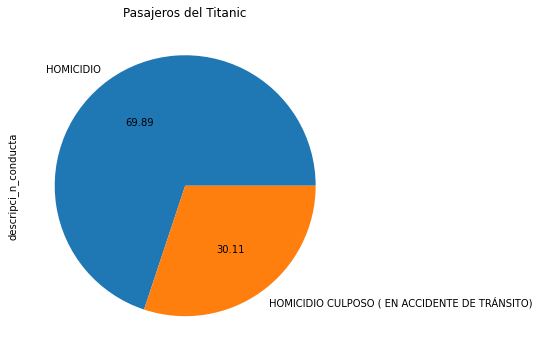

In [ ]:
plot = Medellin['descripci_n_conducta'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(8, 6),
                                            title='Conducta del Homicidio')

In [ ]:
pd.value_counts(Medellin['armas_medios'])

ARMA DE FUEGO                         3478
ARMA BLANCA / CORTOPUNZANTE           1389
VEHICULO                              1355
MOTO                                   871
CONTUNDENTES                           387
CUERDA/SOGA/CADENA                      62
BOLSA PLASTICA                          55
NO REPORTA                              45
-                                       35
NO REPORTADO                            27
BICICLETA                               25
SIN EMPLEO DE ARMAS                     22
CINTAS/CINTURON                         16
GRANADA DE MANO                          6
CORTANTES                                6
VENENO                                   4
ARTEFACTO EXPLOSIVO/CARGA DINAMITA       4
PUNZANTES                                3
COMBUSTIBLE                              3
TREN                                     3
ALMOHADA                                 3
GASES                                    1
PAQUETE BOMBA                            1
ESCOPOLAMIN

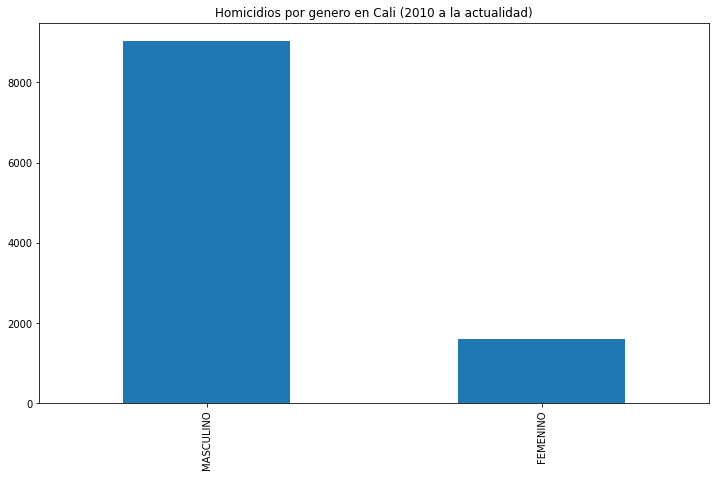

In [ ]:
plot = Cali['genero'].value_counts().plot(kind='bar',title='Homicidios por genero en Cali (2010 a la actualidad)');
                                            

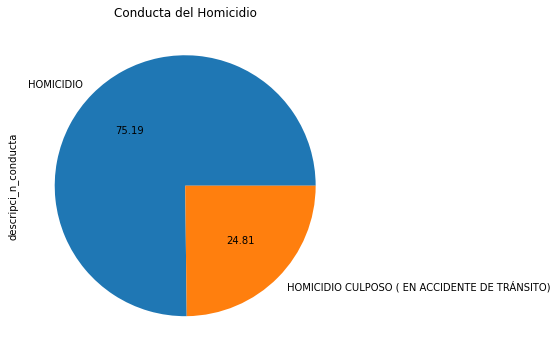

In [ ]:
plot = Cali['descripci_n_conducta'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(8, 6),
                                            title='Conducta del Homicidio')

In [ ]:
pd.value_counts(Cali['armas_medios'])

ARMA DE FUEGO                         5994
ARMA BLANCA / CORTOPUNZANTE           1639
VEHICULO                              1527
MOTO                                  1064
CONTUNDENTES                           322
NO REPORTA                              17
CUERDA/SOGA/CADENA                      15
NO REPORTADO                            15
BICICLETA                               12
SIN EMPLEO DE ARMAS                     10
CORTANTES                                7
-                                        6
PUNZANTES                                4
COMBUSTIBLE                              4
CINTAS/CINTURON                          2
GRANADA DE MANO                          1
LIQUIDOS                                 1
TREN                                     1
CASA BOMBA                               1
ARTEFACTO EXPLOSIVO/CARGA DINAMITA       1
Name: armas_medios, dtype: int64

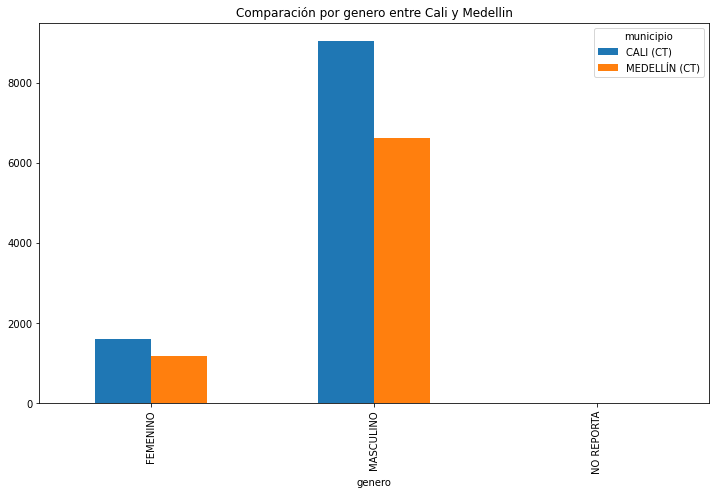

In [ ]:
pd.crosstab(comparacion.genero,comparacion.municipio).plot(kind="bar", title='Comparación por genero entre Cali y Medellin');

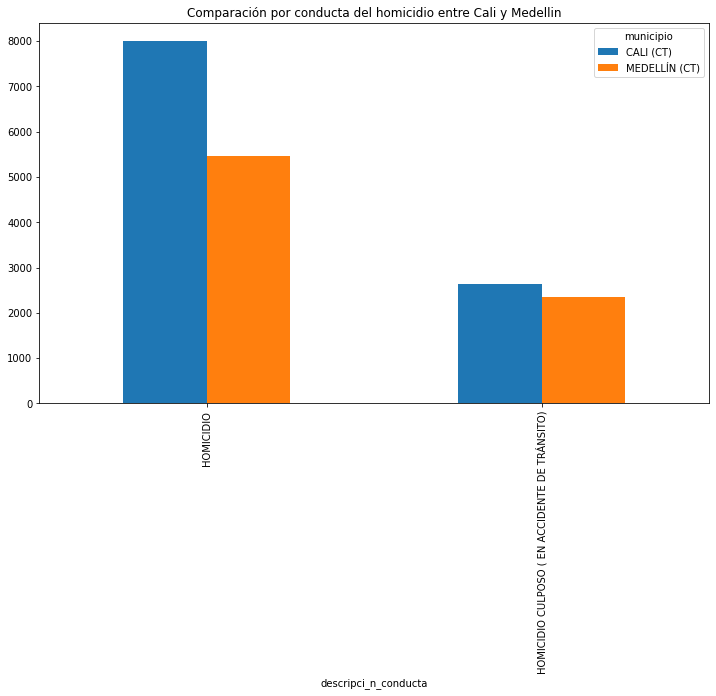

In [ ]:
pd.crosstab(comparacion.descripci_n_conducta,comparacion.municipio).plot(kind="bar", title='Comparación por conducta del homicidio entre Cali y Medellin');

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!